In [323]:
import matplotlib.pyplot as plt
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

cameraman = imread('data/cameraman.jpg')
peppers = imread('data/peppers.png')
print(peppers)

astronaut_grayscale = rgb2gray(astronaut())
astronaut_grayscale

[[101 140 151 ... 192 205 120]
 [123 191 190 ... 154 136 115]
 [126 185 185 ... 144 148 113]
 ...
 [ 92 127 136 ... 181 177 189]
 [ 92 142 126 ... 175 176 196]
 [ 93 119 139 ... 166 171 198]]


array([[5.83434902e-01, 4.14859216e-01, 2.44058431e-01, ...,
        4.75007843e-01, 4.58213333e-01, 4.69121961e-01],
       [6.75588235e-01, 5.56006667e-01, 4.49052941e-01, ...,
        4.68548627e-01, 4.56501176e-01, 4.55958431e-01],
       [7.66334902e-01, 7.00524314e-01, 6.49276078e-01, ...,
        4.76406667e-01, 4.62104314e-01, 4.53978431e-01],
       ...,
       [6.81696471e-01, 6.81979216e-01, 6.71889020e-01, ...,
        0.00000000e+00, 2.82745098e-04, 0.00000000e+00],
       [6.74694510e-01, 6.68532941e-01, 6.64030196e-01, ...,
        2.82745098e-04, 3.92156863e-03, 0.00000000e+00],
       [6.70482353e-01, 6.63189804e-01, 6.52838824e-01, ...,
        0.00000000e+00, 3.92156863e-03, 0.00000000e+00]])

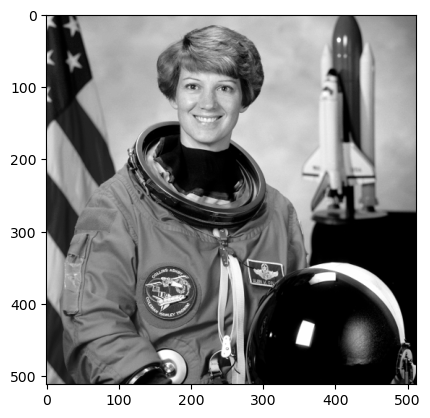

In [4]:
plt.imshow(astronaut_grayscale,cmap='gray')

First we will define some intensity transformations.

In [5]:
# clip transform
def clip_transform(image, a , b):
    image[image <= a] = a
    image[image >= b] = b
    return image
# normalize transformation, a = min f, b = max f as default
def norm_transform(image, a = None, b = None):
    a = image.min() if a is None else a
    b = image.max() if b is None else b
    image = clip_transform( (image - a) / (b - a) , a, b)
    return image


In [324]:
# we will work with equidistant bins for our histogram
def histogram(image, number_bins = 10):
    bins = np.linspace(image.min(),image.max(), number_bins)
    hist_values = []
    # loop over each bin
    for i, b in enumerate(bins[:-1]):
        lower_border = b
        upper_border = bins[i+1]
        # count the number of pixels with value between current bin borders
        hist_value = np.sum( (lower_border <= image) * (image < upper_border) )
        hist_values.append(hist_value)
    return bins, hist_values


# write the explicit histogram function as defined in the script
# resulting tuple of histogram can be pased to h_f to avoid repeated 
# calculation of histogram. Other wise image and
def get_hf_gf(image ,number_bins=10):
    bins, hist_values = histogram(image, number_bins=number_bins)
    def hf(s):
        a, b = bins[0], bins[-1]
        s_index =np.array( np.floor((number_bins-1)*(s-a) / (b-a)).astype(int) )
        # edge case where s is maximal -> set to highest bin
        s_index[s_index <= 0 ] = 0
        s_index[ s_index == number_bins-1 ] = number_bins-2
        return np.array(hist_values)[s_index]
    
    # gf is like hf but uses cumulative hist counts
    def gf(s):
        a, b = bins[0], bins[-1]
        s_index =np.array( np.floor((number_bins-1)*(s-a) / (b-a)).astype(int) )
        # edge case where s is maximal -> set to highest bin 
        s_index[s_index <= 0 ] = 0
        s_index[ s_index == number_bins-1 ] = number_bins-2
        return np.cumsum(np.array(hist_values))[s_index]
        
    return hf,gf

def histogram_equalize_transform(image, number_bins = 10):
    _, gf = get_hf_gf(image, number_bins=number_bins)
    image = norm_transform(image)
    image = gf(image) / (image.shape[0]*image.shape[1])
    return image
    


        

0.213348388671875


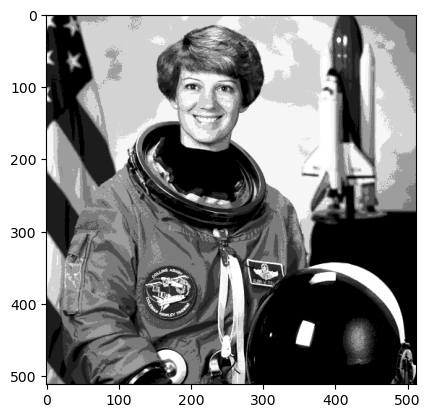

In [325]:
image = histogram_equalize_transform(astronaut_grayscale,number_bins=10)
print(image.min())
plt.imshow(image,cmap='gray')

In [326]:
astronaut_grayscale.max()

1.0

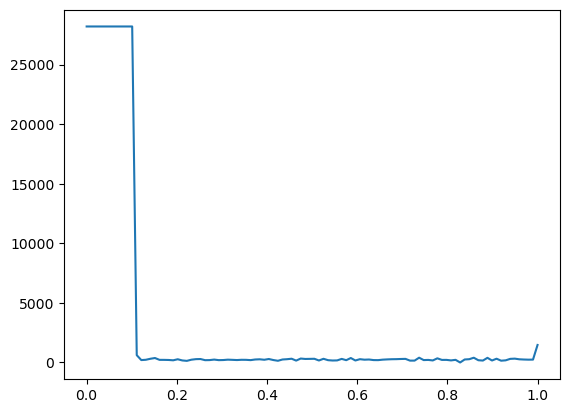

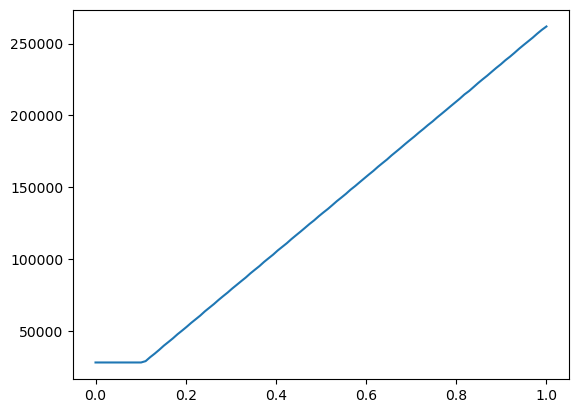

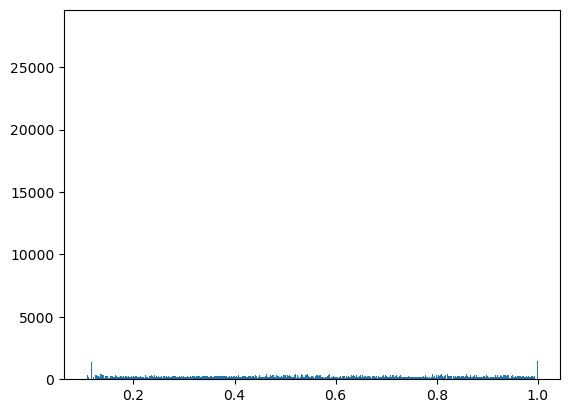

In [327]:
image = histogram_equalize_transform(astronaut_grayscale,number_bins=2000)
#image = astronaut_grayscale
number_bins = 1000
s_sample = np.linspace(0,1,100)
hf, gf = get_hf_gf(image, number_bins=number_bins)
counts = hf(s_sample)
g_counts = gf(s_sample)
#print(counts)

plt.plot(s_sample,counts)
plt.show()
plt.plot(s_sample,g_counts)
plt.show()

bins, counts = histogram(image, number_bins=number_bins)

plt.hist(bins[:-1], bins = bins ,weights=counts)
plt.show()

In [258]:
np.round(np.array([0.2,0.9]))

array([0., 1.])

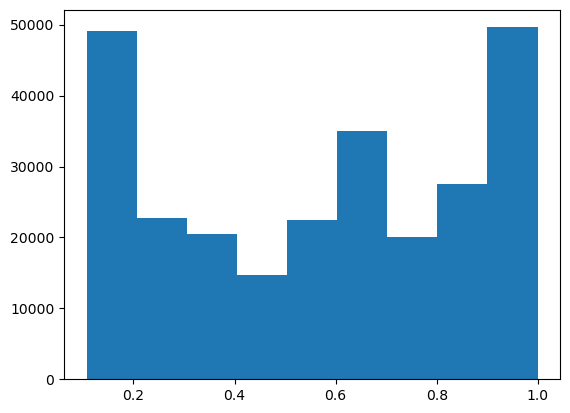

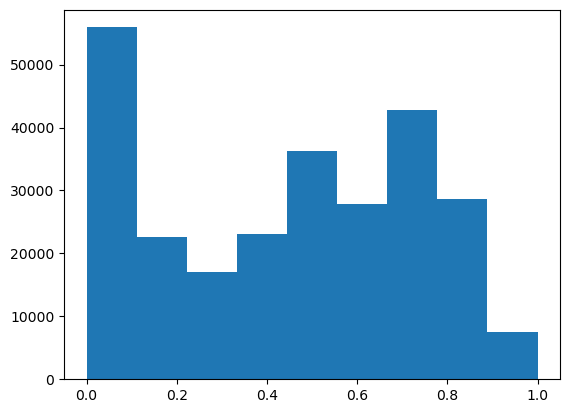

In [303]:
bins, counts = histogram(image, number_bins=number_bins)

plt.hist(bins[:-1], bins = bins ,weights=counts)
plt.show()

bins, counts = histogram(astronaut_grayscale, number_bins=number_bins)

plt.hist(bins[:-1], bins = bins ,weights=counts)
plt.show()

In [185]:
bins



array([0.12087631, 0.12974814, 0.13861997, 0.1474918 , 0.15636363,
       0.16523546, 0.17410729, 0.18297912, 0.19185095, 0.20072278,
       0.20959461, 0.21846644, 0.22733827, 0.2362101 , 0.24508193,
       0.25395376, 0.26282559, 0.27169742, 0.28056925, 0.28944108,
       0.29831291, 0.30718474, 0.31605657, 0.3249284 , 0.33380023,
       0.34267206, 0.35154389, 0.36041572, 0.36928755, 0.37815938,
       0.38703121, 0.39590304, 0.40477487, 0.4136467 , 0.42251853,
       0.43139036, 0.44026219, 0.44913402, 0.45800585, 0.46687768,
       0.47574951, 0.48462134, 0.49349317, 0.502365  , 0.51123683,
       0.52010866, 0.52898049, 0.53785232, 0.54672415, 0.55559598,
       0.56446781, 0.57333964, 0.58221147, 0.5910833 , 0.59995513,
       0.60882696, 0.61769879, 0.62657061, 0.63544244, 0.64431427,
       0.6531861 , 0.66205793, 0.67092976, 0.67980159, 0.68867342,
       0.69754525, 0.70641708, 0.71528891, 0.72416074, 0.73303257,
       0.7419044 , 0.75077623, 0.75964806, 0.76851989, 0.77739

In [297]:
np.log2(2)

1.0